In [1]:
# Get ESM pseudo-ppl scores for one of the DMS assays

In [2]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr

pd.set_option("display.max_columns", 200)
sys.path.append("..")

In [3]:
# Inputs:
dms_reference_file = "../reference_files/DMS_substitutions.csv"
scores_file = "/Users/admin/Documents/Work/2022 Harvard/ProteinGym/benchmarks/DMS_zero_shot/substitutions/Spearman/DMS_substitutions_Spearman_DMS_level.csv"

In [4]:
# Read the reference file
df_ref = pd.read_csv(dms_reference_file)
df_ref

,DMS_id,DMS_filename,UniProt_ID,taxon,source_organism,target_seq,seq_len,includes_multiple_mutants,DMS_total_number_mutants,DMS_number_single_mutants,DMS_number_multiple_mutants,DMS_binarization_cutoff,DMS_binarization_method,first_author,title,year,jo,region_mutated,molecule_name,selection_assay,selection_type,MSA_filename,MSA_start,MSA_end,MSA_len,MSA_bitscore,MSA_theta,MSA_num_seqs,MSA_perc_cov,MSA_num_cov,MSA_N_eff,MSA_Neff_L,MSA_Neff_L_category,MSA_num_significant,MSA_num_significant_L,raw_DMS_filename,raw_DMS_phenotype_name,raw_DMS_directionality,raw_DMS_mutant_column,weight_file_name,pdb_file,pdb_range,ProteinGym_version,raw_mut_offset,coarse_selection_type
0,A0A140D2T1_ZIKV_Sourisseau_2019,A0A140D2T1_ZIKV_Sourisseau_2019.csv,A0A140D2T1_ZIKV,Virus,Zika virus,MKNPKKKSGGFRIVNMLKRGVARVNPLGGLKRLPAGLLLGHGPIRM...,3423,False,9576,9576,0,0.043249,median,Sourisseau,Deep Mutational Scanning Comprehensively Maps ...,2019,10.1128/JVI.01291-19,291-794,Zika virus env,Viral replication,Growth,A0A140D2T1_ZIKV_theta0.99_281-804_11-26-2021_b...,281,804,524,0.2,0.01,16501,0.948,497.0,1357.9,2.732193,medium,329.0,0.661972,A0A140D2T1_ZIKV_Sourisseau_growth_2019.csv,effect,1,mutant,A0A140D2T1_ZIKV_theta_0.01.npy,A0A140D2T1_ZIKV.pdb,291-794,0.1,NaN,OrganismalFitness
1,A0A192B1T2_9HIV1_Haddox_2018,A0A192B1T2_9HIV1_Haddox_2018.csv,A0A192B1T2_9HIV1,Virus,HIV,MRVKGIQMNSQHLLRWGIMILGMIMICSVAGNLWVTVYYGVPVWKD...,852,False,12577,12577,0,-2.200000,manual,Haddox,Mapping mutational effects along the evolution...,2018,10.7554/eLife.34420,30-691,HIV env (BF520),Viral replication,Growth,A0A192B1T2_9HIV1_theta0.99_full_11-26-2021_b09...,1,852,852,0.9,0.01,74854,0.986,840.0,36319.9,43.237976,medium,2382.0,2.835714,A0A192B1T2_9HIV1_Haddox_2018.csv,fitness,1,mutant,A0A192B1T2_9HIV1_theta_0.01.npy,A0A192B1T2_9HIV1.pdb,1-852,0.1,NaN,OrganismalFitness
2,A0A1I9GEU1_NEIME_Kennouche_2019,A0A1I9GEU1_NEIME_Kennouche_2019.csv,A0A1I9GEU1_NEIME,Prokaryote,Neisseria meningitidis,FTLIELMIVIAIVGILAAVALPAYQDYTARAQVSEAILLAEGQKSA...,161,False,922,922,0,0.141000,median,Kennouche,Deep mutational scanning of the Neisseria meni...,2019,10.15252/embj.2019102145,1-161,pilin (PilE),"piliation (20D9 anti-pilus monoclonal Ab), agg...",NaN,A0A1I9GEU1_NEIME_full_11-26-2021_b08.a2m,1,161,161,0.8,0.20,5553,0.857,138.0,2183.6,15.823188,medium,72.0,0.521739,A0A1I9GEU1_NEIME_Kennouche_2019.csv,piliation_log2_ratio,1,mutants,A0A1I9GEU1_NEIME_theta_0.2.npy,A0A1I9GEU1_NEIME.pdb,1-161,0.1,NaN,Activity
3,A0A247D711_LISMN_Stadelmann_2021,A0A247D711_LISMN_Stadelmann_2021.csv,A0A247D711_LISMN,Eukaryote,Listeria monocytogenes,MNINDLIREIKNKDYTVKLSGTDSNSITQLIIRVNNDGNEYVISES...,87,False,1653,1653,0,-0.015563,median,Stadelmann,A deep mutational scanning platform to charact...,2021,10.1101/2021.08.21.457204,1-87,Anti-CRISPR protein AcrIIA4,activity against SpyCas9 inducing an RFP reporter,Flow cytometry,A0A247D711_LISMN_full_b0.3.a2m,1,87,87,0.2,0.20,1316890,1.000,87.0,188739.9,2169.424138,High,209.0,2.402299,A0A247D711_LISMN_Stadelmann_2021.csv,mean_prediction,1,mutant,A0A247D711_LISMN_b03_theta_0.2.npy,A0A247D711_LISMN.pdb,1-87,1.0,NaN,Activity
4,A0A2Z5U3Z0_9INFA_Doud_2016,A0A2Z5U3Z0_9INFA_Doud_2016.csv,A0A2Z5U3Z0_9INFA,Virus,influenza H1N1,MKAKLLVLLYAFVATDADTICIGYHANNSTDTVDTILEKNVAVTHS...,565,False,10715,10715,0,-2.239943,median,Doud,Accurate Measurement of the Effects of All Ami...,2016,10.3390/v8060155,2-565,Influenza hemagglutinin,viral replication,Growth,A0A2Z5U3Z0_9INFA_theta0.99_full_11-26-2021_b09...,1,565,565,0.9,0.01,57581,0.968,547.0,9809.4,17.933090,medium,925.0,1.691042,A0A2Z5U3Z0_9INFA_Doud_2016.csv,transformed_pref,1,mutant,A0A2Z5U3Z0_9INFA_theta_0.01.npy,A0A2Z5U3Z0_9INFA.pdb,1-565,0.1,NaN,OrganismalFitness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,VKOR1_HUMAN_Chiasson_2020_activity,VKOR1_HUMAN_Chiasson_2020_activity.csv,VKOR1_HUMAN,Human,Homo sap

In [5]:
# Get true spearman scores (for comparison later)
df_spearmans = pd.read_csv(scores_file)
new_columns = df_ref.columns.difference(df_spearmans.columns)
df_spearmans = pd.merge(df_spearmans, df_ref[list(new_columns)], left_on="DMS ID", right_on="DMS_id")
df_spearmans

,DMS ID,Site-Independent,EVmutation,DeepSequence (single),DeepSequence (ensemble),EVE (single),EVE (ensemble),Unirep,Unirep evotuned,MSA Transformer (single),MSA Transformer (ensemble),ESM-1b,ESM-1v (single),ESM-1v (ensemble),ESM2 (8M),ESM2 (35M),ESM2 (150M),ESM2 (650M),ESM2 (3B),ESM2 (15B),Wavenet,RITA S,RITA M,RITA L,RITA XL,Progen2 S,Progen2 M,Progen2 Base,Progen2 L,Progen2 XL,GEMME,VESPA,VESPAl,ProtGPT2,Tranception S no retrieval,Tranception M no retrieval,Tranception L no retrieval,Tranception S,Tranception M,Tranception L,TranceptEVE S,TranceptEVE M,TranceptEVE L,CARP (38M),CARP (600K),CARP (640M),CARP (76M),MIF,MIF-ST,ESM-IF1,ProteinMPNN,Number of Mutants,Selection Type,UniProt ID,MSA_Neff_L_category,Taxon,DMS_binarization_cutoff,DMS_binarization_method,DMS_filename,DMS_id,DMS_number_multiple_mutants,DMS_number_single_mutants,DMS_total_number_mutants,MSA_N_eff,MSA_Neff_L,MSA_bitscore,MSA_end,MSA_filename,MSA_len,MSA_num_cov,MSA_num_seqs,MSA_num_significant,MSA_num_significant_L,MSA_perc_cov,MSA_start,MSA_theta,ProteinGym_version,UniProt_ID,coarse_selection_type,first_author,includes_multiple_mutants,jo,molecule_name,pdb_file,pdb_range,raw_DMS_directionality,raw_DMS_filename,raw_DMS_mutant_column,raw_DMS_phenotype_name,raw_mut_offset,region_mutated,selection_assay,selection_type,seq_len,source_organism,target_seq,taxon,title,weight_file_name,year
0,A0A140D2T1_ZIKV_Sourisseau_2019,0.383,0.354,0.131,0.103,0.394,0.405,-0.133,0.062,0.475,0.454,-0.001,-0.048,0.015,-0.073,-0.054,-0.058,0.213,0.363,0.375,0.216,0.361,0.309,0.317,0.305,0.329,0.342,0.328,0.312,0.293,0.430,0.319,0.296,0.005,0.304,0.331,0.272,0.362,0.366,0.351,0.361,0.358,0.373,-0.060,-0.073,0.131,-0.061,-0.061,0.131,0.287,0.129,9576,OrganismalFitness,A0A140D2T1_ZIKV,Medium,Virus,0.043249,median,A0A140D2T1_ZIKV_Sourisseau_2019.csv,A0A140D2T1_ZIKV_Sourisseau_2019,0,9576,9576,1357.9,2.732193,0.2,804,A0A140D2T1_ZIKV_theta0.99_281-804_11-26-2021_b...,524,497.0,16501,329.0,0.661972,0.948,281,0.01,0.1,A0A140D2T1_ZIKV,OrganismalFitness,Sourisseau,False,10.1128/JVI.01291-19,Zika virus env,A0A140D2T1_ZIKV.pdb,291-794,1,A0A140D2T1_ZIKV_Sourisseau_growth_2019.csv,mutant,effect,NaN,291-794,Viral replication,Growth,3423,Zika virus,MKNPKKKSGGFRIVNMLKRGVARVNPLGGLKRLPAGLLLGHGPIRM...,Virus,Deep Mutational Scanning Comprehensively Maps ...,A0A140D2T1_ZIKV_theta_0.01.npy,2019
1,A0A192B1T2_9HIV1_Haddox_2018,0.481,0.407,0.413,0.432,0.509,0.516,0.000,0.513,0.514,0.514,0.456,0.492,0.516,-0.003,0.015,0.035,0.080,0.132,0.164,0.465,0.496,0.507,0.509,0.505,0.497,0.501,0.463,0.490,0.484,0.496,0.541,0.507,0.327,0.492,0.483,0.514,0.509,0.503,0.513,0.524,0.518,0.528,0.422,-0.021,0.497,0.429,0.329,0.451,0.206,0.136,12577,OrganismalFitness,A0A192B1T2_9HIV1,Medium,Virus,-2.200000,manual,A0A192B1T2_9HIV1_Haddox_2018.csv,A0A192B1T2_9HIV1_Haddox_2018,0,12577,12577,36319.9,43.237976,0.9,852,A0A192B1T2_9HIV1_theta0.99_full_11-26-2021_b09...,852,840.0,74854,2382.0,2.835714,0.986,1,0.01,0.1,A0A192B1T2_9HIV1,OrganismalFitness,Haddox,False,10.7554/eLife.34420,HIV env (BF520),A0A192B1T2_9HIV1.pdb,1-852,1,A0A192B1T2_9HIV1_Haddox_2018.csv,mutant,fitness,NaN,30-691,Viral replication,Growth,852,HIV,MRVKGIQMNSQHLLRWGIMILGMIMICSVAGNLWVTVYYGVPVWKD...,Virus,Mapping mutational effects along the evolution...,A0A192B1T2_9HIV1_theta_0.01.npy,2018
2,A0A1I9GEU1_NEIME_Kennouche_2019,-0.011,0.044,0.107,0.098,0.053,0.054,-0.024,0.084,0.094,0.102,0.040,0.068,0.068,-0.037,-0.047,-0.016,0.030,0.027,0.025,0.067,-0.010,0.047,0.071,0.088,0.050,0.088,0.080,0.089,0.095,0.045,0.046,0.036,0.030,0.036,0.055,0.099,0.031,0.041,0.057,0.058,0.061,0.075,-0.055,-0.056,0.039,-0.043,0.051,0.055,0.039,0.040,922,Activity,A0A1I9GEU1_NEIME,Medium,Prokaryote,0.141000,median,A0A1I9GEU1_NEIME_Kennouche_2019.csv,A0A1I9GEU1_NEIME_Kennouche_2019,0,922,922,2183.6,15.823188,0.8,161,A0A1I9GEU1_NEIME_full_11-26-2021_b08.a2m,161,138.0,5553,72.0,0.521739,0.857,1,0.20,0.1,A0A1I9GEU1_NEIME,Activity,Kennouche,False,10.15252/embj.2019102145,pilin (PilE),A0A1I9GEU1

In [119]:
df_spearmans.sort_values(by="ESM-1v (single)", ascending=False)  # Looks like EPHB2_HUMAN_Tsuboyama_2023_1F0M

,DMS ID,Site-Independent,EVmutation,DeepSequence (single),DeepSequence (ensemble),EVE (single),EVE (ensemble),Unirep,Unirep evotuned,MSA Transformer (single),MSA Transformer (ensemble),ESM-1b,ESM-1v (single),ESM-1v (ensemble),ESM2 (8M),ESM2 (35M),ESM2 (150M),ESM2 (650M),ESM2 (3B),ESM2 (15B),Wavenet,RITA S,RITA M,RITA L,RITA XL,Progen2 S,Progen2 M,Progen2 Base,Progen2 L,Progen2 XL,GEMME,VESPA,VESPAl,ProtGPT2,Tranception S no retrieval,Tranception M no retrieval,Tranception L no retrieval,Tranception S,Tranception M,Tranception L,TranceptEVE S,TranceptEVE M,TranceptEVE L,CARP (38M),CARP (600K),CARP (640M),CARP (76M),MIF,MIF-ST,ESM-IF1,ProteinMPNN,Number of Mutants,Selection Type,UniProt ID,MSA_Neff_L_category,Taxon,DMS_binarization_cutoff,DMS_binarization_method,DMS_filename,DMS_id,DMS_number_multiple_mutants,DMS_number_single_mutants,DMS_total_number_mutants,MSA_N_eff,MSA_Neff_L,MSA_bitscore,MSA_end,MSA_filename,MSA_len,MSA_num_cov,MSA_num_seqs,MSA_num_significant,MSA_num_significant_L,MSA_perc_cov,MSA_start,MSA_theta,ProteinGym_version,UniProt_ID,coarse_selection_type,first_author,includes_multiple_mutants,jo,molecule_name,pdb_file,pdb_range,raw_DMS_directionality,raw_DMS_filename,raw_DMS_mutant_column,raw_DMS_phenotype_name,raw_mut_offset,region_mutated,selection_assay,selection_type,seq_len,source_organism,target_seq,taxon,title,weight_file_name,year
57,EPHB2_HUMAN_Tsuboyama_2023_1F0M,0.615,0.706,0.705,0.708,0.732,0.733,-0.320,0.684,0.746,0.766,0.762,0.787,0.789,-0.378,0.768,0.803,0.810,0.769,0.744,0.741,0.555,0.599,0.685,0.656,0.641,0.664,0.684,0.705,0.735,0.795,0.752,0.738,0.677,0.612,0.603,0.644,0.716,0.711,0.728,0.741,0.737,0.735,0.625,-0.253,0.618,0.630,0.665,0.604,0.828,0.760,1960,Stability,EPHB2_HUMAN,High,Human,-1.932054,median,EPHB2_HUMAN_Tsuboyama_2023_1F0M.csv,EPHB2_HUMAN_Tsuboyama_2023_1F0M,721,1239,1960,8426.3,142.818644,0.4,66,EPHB2_HUMAN_2023-08-07_b04.a2m,66,59.0,212234,29.0,0.491525,0.894,1,0.20,1.0,EPHB2_HUMAN,Stability,Tsuboyama,True,10.1038/s41586-023-06328-18,Ephrin type-B receptor 2,EPHB2_HUMAN.pdb,1-66,1,Tsuboyama2023_Dataset2_Dataset15,mut_type,ddG_ML_float,NaN,1-66,Stability,cDNA display proteolysis,66,Homo sapiens,SFNTVDEWLEAIKMGQYKESFANAGFTSFDVVSQMMMEDILRVGVT...,Human,Mega-scale experimental analysis of protein fo...,EPHB2_HUMAN_theta0.2_2023-08-07_b04.npy,2023
124,PHOT_CHLRE_Chen_2023,0.211,0.440,0.731,0.706,0.352,0.335,0.654,0.552,0.792,0.776,0.647,0.757,0.783,0.768,0.823,0.714,0.749,0.714,0.758,0.652,0.685,0.678,0.596,0.699,0.533,0.616,0.596,0.656,0.602,0.587,0.572,0.490,0.303,0.565,0.511,0.602,0.597,0.564,0.606,0.416,0.445,0.422,0.623,0.395,0.599,0.621,0.200,0.502,0.669,0.410,167529,Activity,PHOT_CHLRE,High,Eukaryote,0.631702,median,PHOT_CHLRE_Chen_2023.csv,PHOT_CHLRE_Chen_2023,165407,2122,167529,610128.5,5923.577670,0.2,118,PHOT_CHLRE_2023-08-07_b02.a2m,118,103.0,1627150,232.0,2.252427,0.873,1,0.20,1.0,PHOT_CHLRE,Activity,Chen,True,10.1021/acssynbio.2c00662,Phototropin,PHOT_CHLRE.pdb,1-118,1,sb2c00662_si_001.xlsx,mutant,mean,NaN,1-118,Fluorescence,FACS,118,Chlamydomonas reinhardtii,AGLRHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFLQ...,Eukaryote,Deep Mutational Scanning of an Oxygen-Independ...,PHOT_CHLRE_theta0.2_2023-08-07_b02.npy,2023
50,DNJA1_HUMAN_Tsuboyama_2023_2LO1,0.738,0.750,0.759,0.757,0.767,0.764,0.756,0.732,0.700,0.720,0.773,0.756,0.785,0.827,0.816,0.817,0.803,0.753,0.798,0.781,0.669,0.736,0.776,0.750,0.782,0.765,0.774,0.721,0.764,0.775,0.729,0.714,0.660,0.780,0.776,0.805,0.808,0.816,0.823,0.774,0.787,0.787,0.670,0.164,0.443,0.684,0.643,0.528,0.779,0.785,2264,Stability,DNJA1_HUMAN,High,Human,-2.239788,median,DNJA1_HUMAN_Tsuboyama_2023_2LO1.csv,DNJA1_HUMAN_Tsuboyama_2023_2LO1,1048,1216,2264,35361.9,561.300000,0.7,65,DNJA1_HUMAN_2023-08-07_b07.a2m,65,63.0,280284,52.0,0.825397,0.969,1,0.20,1.0,DNJA1_HUMAN,Stability,Tsuboyama,True,10.1038/s41586-023-06328-16,DnaJ homolog subfamily A member 1,DNJA1_HUMAN.pdb,1-65,1,Tsuboyama2023_Dataset2_Dataset13,mut_type,ddG_ML_float,NaN,1-65,Stability,cDN

In [101]:
# Same as before, get pseudolikelihoods
command = f"../proteingym/baselines/esm/compute_fitness.py \
    --model-location esm1v_t33_650M_UR90S_1 \
    --model_type ESM1v \
    --dms_index 57 \
    --dms_mapping ../reference_files/DMS_substitutions.csv \
    --dms-input ../data/DMS_substitutions/ \
    --dms-output ./model_scores_out/debug_esm_masked_marginals/ \
    --scoring-strategy masked-marginals \
    --scoring-window optimal \
    --device mps"  # Should try use mps
! python {command}

Arguments: Namespace(model_type=['ESM1v'], model_location=['esm1v_t33_650M_UR90S_1'], sequence=None, dms_input=PosixPath('../data/DMS_substitutions'), dms_index=57, dms_mapping='../reference_files/DMS_substitutions.csv', mutation_col='mutant', dms_output=PosixPath('model_scores_out/debug_esm_masked_marginals'), offset_idx=1, scoring_strategy='masked-marginals', msa_path=None, msa_sampling_strategy='sequence-reweighting', msa_samples=400, msa_weights_folder=None, seeds=[1], filter_msa=False, hhfilter_min_cov=75, hhfilter_max_seq_id=90, hhfilter_min_seq_id=0, path_to_hhfilter='/n/groups/marks/software/hhsuite/hhsuite-3.3.0', scoring_window='optimal', overwrite_prior_scores=False, device='mps', nogpu=False)
Compute scores for DMS: EPHB2_HUMAN_Tsuboyama_2023_1F0M
tmp df head:    mutant  ... DMS_score_bin
0   L41H  ...             1
1   L41I  ...             1
2   L41K  ...             1
3   L41M  ...             1
4   L41N  ...             1

[5 rows x 4 columns]
df shape: (1048, 4)
Starti

SignificanceResult(statistic=0.8019854196577922, pvalue=2.6194475585292117e-236)

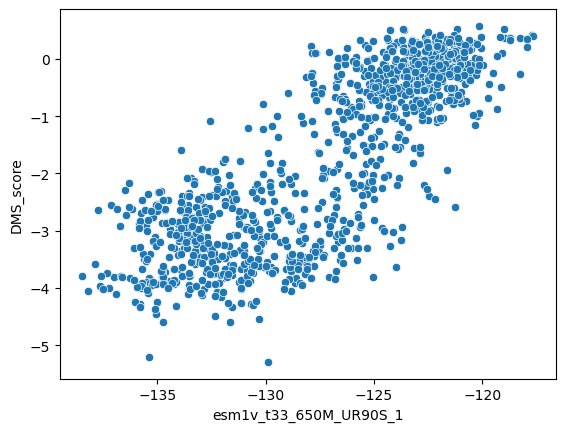

In [103]:
debug_file = "/Users/admin/Documents/Work/2022 Harvard/ProteinGym/notebooks/model_scores_out/debug_esm_masked_pseudo_ppl/EPHB2_HUMAN_Tsuboyama_2023_1F0M.csv"
df_debug = pd.read_csv(debug_file)
sns.scatterplot(data=df_debug, x="esm1v_t33_650M_UR90S_1", y="DMS_score")
spearmanr(df_debug["esm1v_t33_650M_UR90S_1"], df_debug["DMS_score"])

<Axes: xlabel='esm1v_masked_pl', ylabel='esm1v_wt_marginals'>

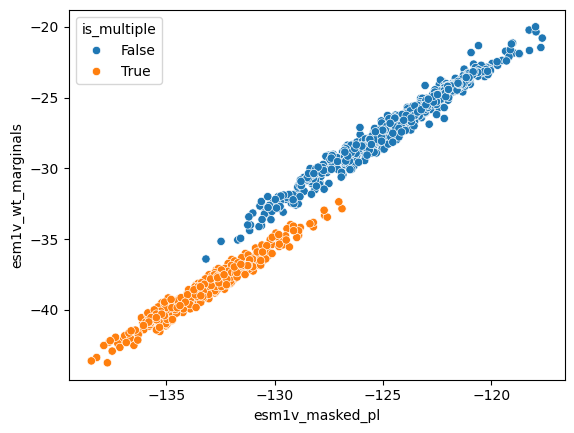

In [36]:
# Compare masked marginals with wt marginals
df_masked = pd.read_csv("/Users/admin/Documents/Work/2022 Harvard/ProteinGym/notebooks/model_scores_out/debug_esm_masked_pseudo_ppl/EPHB2_HUMAN_Tsuboyama_2023_1F0M.csv")
df_wt_marginals = pd.read_csv("/Users/admin/Documents/Work/2022 Harvard/ProteinGym/notebooks/model_scores_out/debug_esm_wt_pseudo_ppl/EPHB2_HUMAN_Tsuboyama_2023_1F0M.csv")
df_pseudos_merged = pd.merge(df_masked.rename(columns={"esm1v_t33_650M_UR90S_1": "esm1v_masked_pl"}), df_wt_marginals.rename(columns={"esm1v_t33_650M_UR90S_1": "esm1v_wt_marginals"}), on="mutant")
df_pseudos_merged["is_multiple"] = df_pseudos_merged["mutant"].str.contains(":")
sns.scatterplot(data=df_pseudos_merged, x="esm1v_masked_pl", y="esm1v_wt_marginals", hue="is_multiple")  # Why is the scale completely different?

In [20]:
scores_true = pd.read_csv("/Users/admin/Documents/Work/2022 Harvard/ProteinGym/notebooks/model_scores_out/EPHB2_HUMAN_Tsuboyama_2023_1F0M.csv")
scores_true

,mutant,mutated_sequence,DMS_score,DMS_score_bin,SaProt_650M_AF2,SaProt_35M_AF2,Site_Independent,EVmutation,DeepSequence_single,DeepSequence_ensemble,EVE_single,EVE_ensemble,Unirep,Unirep_evotune,MSA_Transformer_single,MSA_Transformer_ensemble,ESM1b,ESM1v_single,ESM1v_ensemble,ESM2_8M,ESM2_35M,ESM2_150M,ESM2_650M,ESM2_3B,ESM2_15B,Wavenet,RITA_s,RITA_m,RITA_l,RITA_xl,Progen2_small,Progen2_medium,Progen2_base,Progen2_large,Progen2_xlarge,GEMME,VESPA,VESPAl,ProtGPT2,Tranception_S_no_retrieval,Tranception_M_no_retrieval,Tranception_L_no_retrieval,Tranception_S,Tranception_M,Tranception_L,TranceptEVE_S,TranceptEVE_M,TranceptEVE_L,CARP_38M,CARP_600K,CARP_640M,CARP_76M,MIF,MIFST,ESM-IF1,ProteinMPNN,ProtSSN_k10_h512,ProtSSN_k10_h768,ProtSSN_k10_h1280,ProtSSN_k20_h512,ProtSSN_k20_h768,ProtSSN_k20_h1280,ProtSSN_k30_h512,ProtSSN_k30_h768,ProtSSN_k30_h1280,ProtSSN_ensemble
0,F26P:M35T,SFNTVDEWLEAIKMGQYKESFANAGPTSFDVVSQTMMEDILRVGVT...,-4.082132,0,-19.605938,-11.592758,-9.034792,-12.162398,-11.403671,-11.409247,-12.023804,-12.028970,-2.999457,-1.853571,-13.162860,-14.688975,-23.146999,-10.736126,-10.156316,-0.251414,-11.596382,-11.986672,-18.916766,-19.451235,-21.358541,-108.216664,-4.446759,-2.951793,-2.958928,-2.519827,-0.031017,-0.027108,-0.026564,-0.027248,-0.020681,-12.953170,-2.076533,-1.896106,-9.558295,-0.233745,-0.236364,-0.226869,-0.183157,-0.178589,-0.164080,-0.149992,-0.146813,-0.130381,-5.063469,-0.380746,-7.188397,-4.978400,-12.591140,-12.051183,-1.698578,-1.757033,-33.359134,-31.304851,-30.578440,-33.418207,-32.619381,-31.711150,-30.046630,-33.010364,-34.198410,-32.249618
1,F26P:M35V,SFNTVDEWLEAIKMGQYKESFANAGPTSFDVVSQVMMEDILRVGVT...,-3.838992,0,-17.837517,-11.024804,-6.589707,-10.970538,-9.131393,-9.297620,-9.525711,-9.501321,-2.999357,-1.867408,-10.291266,-12.381492,-19.908286,-7.731404,-7.944349,-0.357326,-9.502849,-8.876047,-16.180651,-16.498244,-17.815838,-106.648555,-4.331908,-2.870559,-2.800261,-2.469913,-0.031118,-0.025305,-0.026121,-0.025499,-0.018700,-10.658752,-1.874434,-1.707589,-8.937403,-0.199369,-0.190516,-0.172253,-0.148041,-0.140800,-0.125896,-0.123546,-0.121151,-0.108400,-4.034654,-0.387872,-6.710264,-3.637668,-12.928338,-12.049011,-1.700899,-1.726930,-31.213266,-28.756556,-27.459669,-30.924534,-29.185428,-29.579371,-27.190666,-29.939906,-31.940948,-29.576705
2,F26P:M35W,SFNTVDEWLEAIKMGQYKESFANAGPTSFDVVSQWMMEDILRVGVT...,-3.023812,0,-20.495184,-14.196461,-10.981693,-14.013762,-14.255920,-13.870590,-14.392349,-14.416891,-3.027202,-1.933315,-16.622048,-17.978755,-28.157420,-13.253550,-12.194416,-2.172166,-13.391236,-14.442995,-19.901065,-18.886394,-25.110345,-111.699157,-4.626498,-3.200447,-3.196464,-3.011789,-0.032242,-0.027441,-0.028988,-0.029010,-0.023343,-15.871758,-2.268128,-1.896106,-9.191541,-0.288167,-0.331649,-0.315511,-0.220365,-0.239673,-0.225059,-0.168947,-0.182147,-0.168993,-5.211197,-1.180059,-8.685518,-5.474221,-14.444312,-13.068483,-1.610747,-1.754253,-32.312173,-29.477106,-30.649124,-33.431492,-34.041474,-36.139318,-31.506929,-33.915938,-35.002035,-32.941732
3,F26P:M35Y,SFNTVDEWLEAIKMGQYKESFANAGPTSFDVVSQYMMEDILRVGVT...,-3.534041,0,-23.821156,-14.534191,-9.432489,-13.107840,-12.334839,-12.630792,-13.354752,-13.070276,-3.016285,-1.838245,-16.418020,-18.494445,-27.151727,-12.327799,-11.212430,-1.237960,-12.861658,-14.532128,-20.971709,-19.375045,-24.178319,-111.879123,-4.523189,-3.027280,-3.075968,-2.838291,-0.031895,-0.026331,-0.027850,-0.027470,-0.021764,-15.966203,-2.298071,-1.896106,-9.142382,-0.231615,-0.269126,-0.214499,-0.182155,-0.194730,-0.163345,-0.153044,-0.158460,-0.139317,-4.818255,-0.732266,-8.615097,-5.385329,-14.227808,-14.080634,-1.613323,-1.783364,-34.727652,-30.935520,-32.457939,-34.718494,-33.931196,-34.409992,-31.615894,-34.893831,-35.767901,-33.717602
4,F26Q,SFNTVDEWLEAIKMGQYKESFANAGQTSFDVVSQMMMEDILRVGVT...,-2.072291,0,-11.434710,-7.401108,-8.701648,-8.156203,-7.264099,-7.612640,-7.497208,-7.463251,-2.996353,-1.675735,-7.013581,-7.733605,-12.797976,-4.210552,-5.458718,-0.05822

,mutant,mutated_sequence_x,DMS_score_x,DMS_score_bin_x,SaProt_650M_AF2,SaProt_35M_AF2,Site_Independent,EVmutation,DeepSequence_single,DeepSequence_ensemble,EVE_single,EVE_ensemble,Unirep,Unirep_evotune,MSA_Transformer_single,MSA_Transformer_ensemble,ESM1b,ESM1v_single,ESM1v_ensemble,ESM2_8M,ESM2_35M,ESM2_150M,ESM2_650M,ESM2_3B,ESM2_15B,Wavenet,RITA_s,RITA_m,RITA_l,RITA_xl,Progen2_small,Progen2_medium,Progen2_base,Progen2_large,Progen2_xlarge,GEMME,VESPA,VESPAl,ProtGPT2,Tranception_S_no_retrieval,Tranception_M_no_retrieval,Tranception_L_no_retrieval,Tranception_S,Tranception_M,Tranception_L,TranceptEVE_S,TranceptEVE_M,TranceptEVE_L,CARP_38M,CARP_600K,CARP_640M,CARP_76M,MIF,MIFST,ESM-IF1,ProteinMPNN,ProtSSN_k10_h512,ProtSSN_k10_h768,ProtSSN_k10_h1280,ProtSSN_k20_h512,ProtSSN_k20_h768,ProtSSN_k20_h1280,ProtSSN_k30_h512,ProtSSN_k30_h768,ProtSSN_k30_h1280,ProtSSN_ensemble,mutated_sequence_y,DMS_score_y,DMS_score_bin_y,esm1v_masked_marginals_pseudolikelihood,Ensemble_ESM1v
0,L41H,SFNTVDEWLEAIKMGQYKESFANAGFTSFDVVSQMMMEDIHRVGVT...,-0.561077,1,-3.765948,-0.419778,-1.657446,-3.476849,-2.937927,-2.615710,-3.257553,-2.859506,-3.004960,-1.582160,-3.401159,-1.870785,-8.064598,-0.184592,-0.764370,-0.621884,-0.760560,-0.675983,-0.478036,-2.032854,-3.218644,-91.755710,-4.127542,-2.793528,-2.321580,-2.213763,-0.030387,-0.022778,-0.022522,-0.022536,-0.014447,-0.678106,-0.539106,-0.466218,-8.703834,-0.077386,-0.102523,-0.115072,-0.047328,-0.057672,-0.054103,-0.034388,-0.038564,-0.027078,0.050197,-0.576206,-4.947200,-0.339084,-5.718466,-6.816092,-1.290669,-1.616594,-6.893719,-6.159193,-5.865504,-5.651778,-7.341051,-5.679308,-6.255381,-6.192438,-5.236784,-6.141684,SFNTVDEWLEAIKMGQYKESFANAGFTSFDVVSQMMMEDIHRVGVT...,-0.561077,1,-121.436002,-121.436002
1,L41I,SFNTVDEWLEAIKMGQYKESFANAGFTSFDVVSQMMMEDIIRVGVT...,0.521146,1,-0.440000,-0.381602,0.019018,-2.501291,-1.951859,-1.268335,-2.090714,-1.692599,-2.994862,-1.300411,-1.981611,-1.302946,-5.579095,0.082297,-0.673957,-0.229367,-0.417582,-0.183386,-0.105143,-0.355398,-0.188671,-92.069477,-3.763037,-2.436332,-1.994350,-1.875434,-0.026957,-0.021927,-0.020873,-0.020982,-0.012312,-0.839791,-0.273925,-0.216247,-8.703382,-0.046916,-0.039566,-0.030904,-0.020889,-0.019894,-0.013161,-0.020435,-0.023414,-0.017738,-0.221721,-0.405376,-3.358173,-0.513028,-3.539817,-6.061872,-1.286379,-1.654901,-6.988775,-5.836586,-5.235387,-6.104957,-6.888780,-6.835880,-6.466758,-6.159256,-5.649666,-6.240672,SFNTVDEWLEAIKMGQYKESFANAGFTSFDVVSQMMMEDIIRVGVT...,0.521146,1,-121.169115,-121.169115
2,L41K,SFNTVDEWLEAIKMGQYKESFANAGFTSFDVVSQMMMEDIKRVGVT...,-0.063450,1,-4.893740,1.922228,1.793368,-2.700545,-1.406616,-1.373456,-0.425812,-0.689209,-2.985847,-1.617744,-4.229008,-1.682963,-7.330874,0.707174,1.510875,0.707130,2.259526,1.999335,1.667925,-1.552101,-1.536005,-90.555622,-3.978586,-2.800711,-2.331068,-2.246847,-0.028709,-0.022337,-0.023274,-0.023037,-0.014480,-2.433159,-0.532978,-0.402867,-8.639423,-0.045635,-0.069001,-0.126554,-0.002532,-0.012921,-0.028377,-0.005239,-0.009561,-0.004018,3.545207,0.771027,-2.551372,2.001276,-2.749561,-5.045160,-1.245227,-1.594135,-3.343392,-2.624274,-2.819031,-2.192186,-3.898571,-2.334007,-2.423487,-3.188495,-1.754833,-2.730920,SFNTVDEWLEAIKMGQYKESFANAGFTSFDVVSQMMMEDIKRVGVT...,-0.063450,1,-120.544228,-120.544228
3,L41M,SFNTVDEWLEAIKMGQYKESFANAGFTSFDVVSQMMMEDIMRVGVT...,-0.018442,1,0.446732,-0.654328,-1.367053,-3.758314,-2.191635,-2.317340,-3.101273,-2.398212,-3.000629,-1.331719,-1.580966,-1.026150,-3.187047,-0.655216,-0.808626,-0.564352,-0.789117,-0.741425,-1.158033,-0.835277,-0.586046,-91.189557,-3.792431,-2.456587,-1.903970,-1.806670,-0.027290,-0.021851,-0.020928,-0.021115,-0.011788,-1.144049,-0.284292,-0.216247,-8.918483,-0.023094,-0.031046,-0.043996,-0.023718,-0.026670,-0.029580,-0.026764,-0.028282,-0.026297,-0.378053,-0.907514,-3.257421,-0.400795,-3.861181,-5.667803,-1.299735,-1.639957,-6.844342,-6.175316,-6.630730,-6.287386,-7.551446,-6.546000,-6.643455,-6.395713,-5.747456,-6.535761,SFNTVDEWLEAIKMGQY

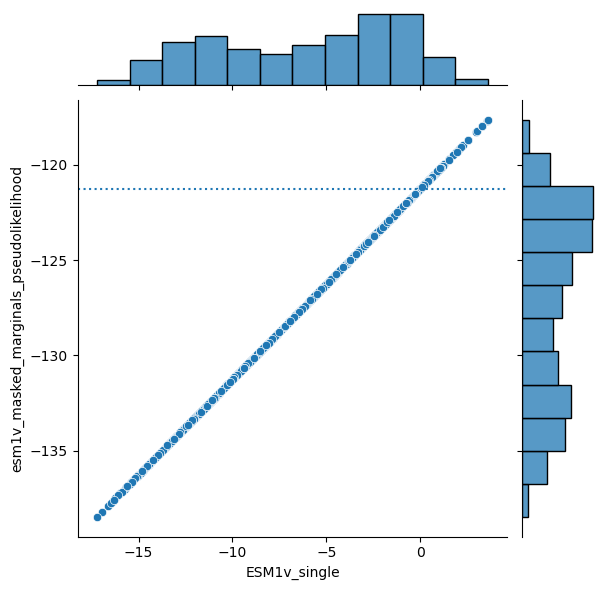

In [118]:
df_debug_merged = scores_true.merge(df_masked.rename(columns={"esm1v_t33_650M_UR90S_1": "esm1v_masked_marginals_pseudolikelihood"}), on="mutant")
# scores_recalculated = pd.read_csv("/Users/admin/Documents/Work/2022 Harvard/ProteinGym/notebooks/model_scores_out/debug_esm_masked_marginals/EPHB2_HUMAN_Tsuboyama_2023_1F0M.csv")
# df_debug_merged = scores_true.merge(scores_recalculated.rename(columns={"esm1v_t33_650M_UR90S_1": "esm1v_masked_marginals"}), on="mutant")
display(df_debug_merged.head())
sns.jointplot(data=df_debug_merged, x="ESM1v_single", y="esm1v_masked_marginals_pseudolikelihood")
wt_marginal_pseudo_score = -121.25140973180532
plt.axhline(wt_marginal_pseudo_score, ls=":")

### Look directly at marginals

In [49]:
from proteingym.baselines.esm import esm  # since esm.inverse_folding is imported below, you actually have to re-import esm here
alphabet = esm.Alphabet.from_architecture("ESM-1")
alphabet.get_idx()

In [54]:
alphabet.get_tok(4)

'L'

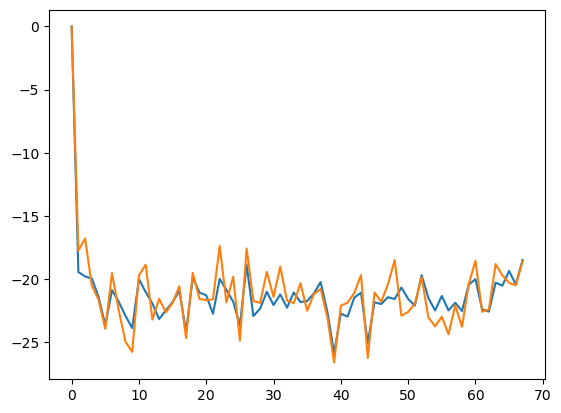

In [56]:
token_probs_masked = np.load("./token_probs_masked.npy")[0]
token_probs_wt = np.load("./token_probs_wt.npy")[0]
target_seq = "SFNTVDEWLEAIKMGQYKESFANAGFTSFDVVSQMMMEDILRVGVTLAGHQKKILNSIQVMRAQMN"
token_probs_masked[:,0].shape
plt.plot(token_probs_masked[:,0])
plt.plot(token_probs_wt[:,0])
plt.show()

In [67]:
token_probs_wt.shape

(68, 33)

In [92]:
alphabet.all_toks

['<null_0>',
 '<pad>',
 '<eos>',
 '<unk>',
 'L',
 'A',
 'G',
 'V',
 'S',
 'E',
 'R',
 'T',
 'I',
 'D',
 'P',
 'K',
 'Q',
 'N',
 'F',
 'Y',
 'M',
 'H',
 'W',
 'C',
 'X',
 'B',
 'U',
 'Z',
 'O',
 '.',
 '-',
 '<null_1>',
 '<cls>',
 '<mask>',
 '<sep>']

In [75]:
toks = [alphabet.get_tok(i) for i in range(33)]
toks

['<null_0>',
 '<pad>',
 '<eos>',
 '<unk>',
 'L',
 'A',
 'G',
 'V',
 'S',
 'E',
 'R',
 'T',
 'I',
 'D',
 'P',
 'K',
 'Q',
 'N',
 'F',
 'Y',
 'M',
 'H',
 'W',
 'C',
 'X',
 'B',
 'U',
 'Z',
 'O',
 '.',
 '-',
 '<null_1>',
 '<cls>']

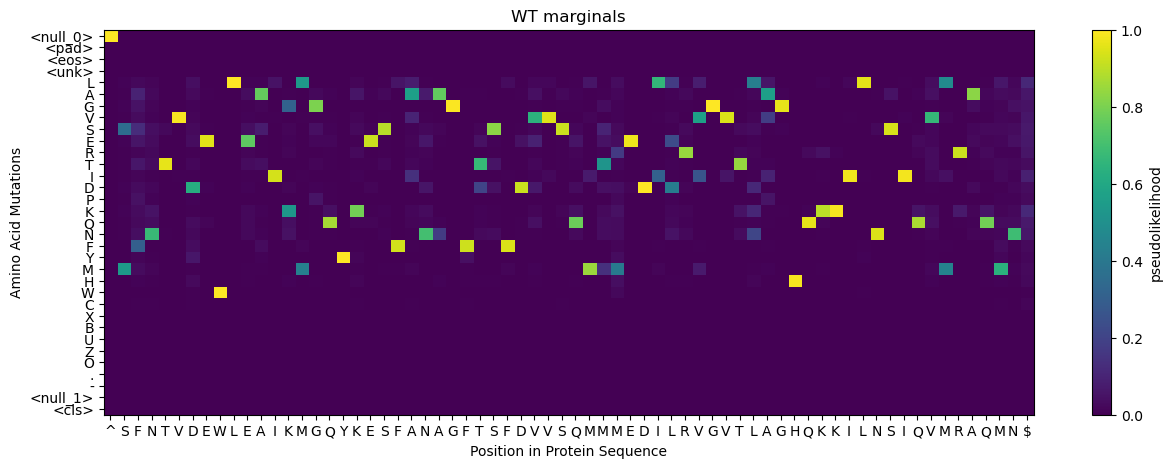

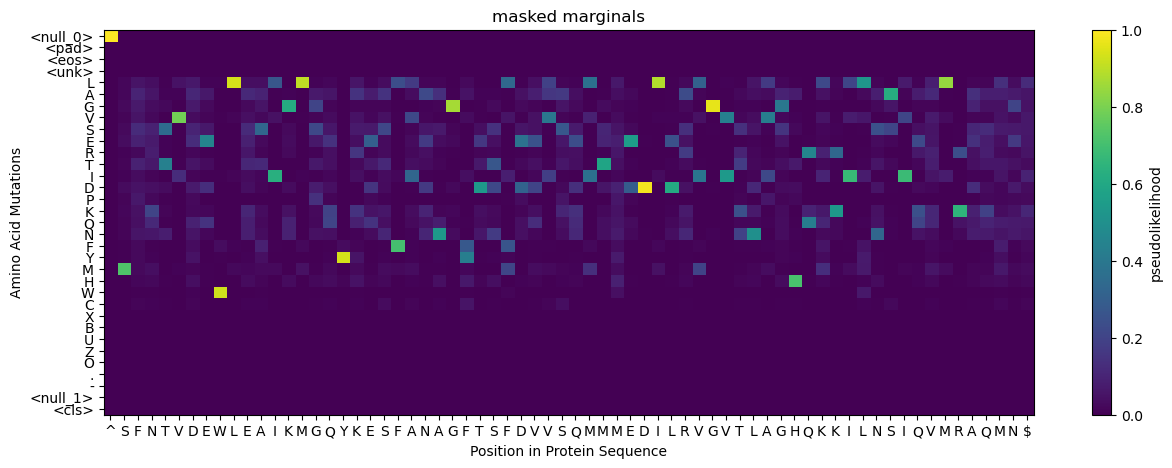

In [90]:
# Initialize heatmap
target_seq_with_toks = "^" + target_seq + "$"
end_pos = len(target_seq_with_toks)
start_pos=1
# heatmap = np.zeros((len(alphabet.all_toks), end_pos - start_pos + 1))
heatmap = token_probs_wt.T
def plot_heatmap(heatmap, title=None):
    # Visualize the heatmap
    plt.figure(figsize=(15, 5))
    plt.imshow(heatmap, cmap="viridis", aspect="auto")
    plt.xticks(range(end_pos - start_pos + 1), list(target_seq_with_toks[start_pos-1:end_pos]))
    plt.yticks(range(len(toks)), toks)
    plt.xlabel("Position in Protein Sequence")
    plt.ylabel("Amino Acid Mutations")
    if title:
        plt.title(title)
    else:
        plt.title("Predicted Effects of Mutations on Protein Sequence (LLR)")
    plt.colorbar(label="pseudolikelihood")
    plt.show()
plot_heatmap(np.exp(token_probs_wt).T, title="WT marginals")
plot_heatmap(np.exp(token_probs_masked).T, title="masked marginals")

In [88]:
# Recalculate the probability of wt
wt_probs = np.exp(token_probs_wt)
wt_probs

array([[1.0000000e+00, 7.8982925e-15, 8.8887959e-15, ..., 5.2901332e-16,
        5.4113107e-16, 1.1350092e-14],
       [1.9387628e-08, 1.2107783e-11, 1.3503060e-11, ..., 1.0598179e-09,
        1.4080506e-09, 1.1959033e-11],
       [5.0904138e-08, 3.9681265e-11, 4.2576415e-11, ..., 6.0548793e-09,
        3.8560484e-09, 3.8867104e-11],
       ...,
       [1.4964654e-09, 2.3248837e-11, 2.0924004e-11, ..., 2.7642322e-09,
        2.5241502e-09, 2.1999217e-11],
       [1.2470711e-09, 2.0532961e-11, 1.7510925e-11, ..., 2.3669045e-09,
        2.3002340e-09, 2.1946871e-11],
       [8.3003675e-09, 1.0111054e-10, 9.6880878e-11, ..., 5.2320916e-09,
        4.5761150e-09, 1.0333708e-10]], dtype=float32)

In [86]:
token_probs_masked.sum(axis=1)

array([-943.43774, -338.6128 , -311.86804, -320.72922, -358.00226,
       -420.97107, -315.05823, -355.17398, -422.94562, -452.4163 ,
       -327.3684 , -332.35263, -398.0393 , -373.6756 , -427.67966,
       -338.0638 , -329.56784, -422.16312, -336.86636, -344.40515,
       -328.49475, -462.33572, -350.67575, -352.35907, -356.96255,
       -391.19693, -365.73495, -358.7578 , -354.22787, -375.8827 ,
       -356.53525, -340.19922, -402.70468, -339.86505, -346.67316,
       -406.74417, -369.3793 , -311.11176, -373.67026, -449.3814 ,
       -430.1706 , -367.7298 , -338.37537, -377.04965, -414.46603,
       -424.43304, -347.3375 , -345.66245, -365.55518, -330.94476,
       -355.49088, -415.06186, -335.71915, -380.0793 , -463.07983,
       -359.77838, -353.9619 , -378.53915, -437.98264, -355.01727,
       -332.76657, -414.2472 , -402.02228, -331.44525, -327.89517,
       -311.08374, -321.50763, -306.7945 ], dtype=float32)

In [114]:
# Manually calculate for an example
display(df_masked.head())
seq_test = df_masked["mutated_sequence"][0]

# Get probabilities
probs = []
for i in range(len(seq_test)):
    probs.append(token_probs_masked[i+1, alphabet.get_idx(seq_test[i])])
sum(probs)

,mutant,mutated_sequence,DMS_score,DMS_score_bin,esm1v_t33_650M_UR90S_1,Ensemble_ESM1v
0,L41H,SFNTVDEWLEAIKMGQYKESFANAGFTSFDVVSQMMMEDIHRVGVT...,-0.561077,1,-121.436002,-121.436002
1,L41I,SFNTVDEWLEAIKMGQYKESFANAGFTSFDVVSQMMMEDIIRVGVT...,0.521146,1,-121.169115,-121.169115
2,L41K,SFNTVDEWLEAIKMGQYKESFANAGFTSFDVVSQMMMEDIKRVGVT...,-0.063450,1,-120.544228,-120.544228
3,L41M,SFNTVDEWLEAIKMGQYKESFANAGFTSFDVVSQMMMEDIMRVGVT...,-0.018442,1,-121.906624,-121.906624
4,L41N,SFNTVDEWLEAIKMGQYKESFANAGFTSFDVVSQMMMEDINRVGVT...,-0.866049,1,-119.344355,-119.344355


-121.4360019788146

In [129]:
df_masked

,mutant,mutated_sequence,DMS_score,DMS_score_bin,esm1v_t33_650M_UR90S_1,Ensemble_ESM1v
0,L41H,SFNTVDEWLEAIKMGQYKESFANAGFTSFDVVSQMMMEDIHRVGVT...,-0.561077,1,-121.436002,-121.436002
1,L41I,SFNTVDEWLEAIKMGQYKESFANAGFTSFDVVSQMMMEDIIRVGVT...,0.521146,1,-121.169115,-121.169115
2,L41K,SFNTVDEWLEAIKMGQYKESFANAGFTSFDVVSQMMMEDIKRVGVT...,-0.063450,1,-120.544228,-120.544228
3,L41M,SFNTVDEWLEAIKMGQYKESFANAGFTSFDVVSQMMMEDIMRVGVT...,-0.018442,1,-121.906624,-121.906624
4,L41N,SFNTVDEWLEAIKMGQYKESFANAGFTSFDVVSQMMMEDINRVGVT...,-0.866049,1,-119.344355,-119.344355
...,...,...,...,...,...,...
1043,Y17W:H50S,SFNTVDEWLEAIKMGQWKESFANAGFTSFDVVSQMMMEDILRVGVT...,-2.321345,0,-130.644441,-130.644441
1044,Y17W:H50T,SFNTVDEWLEAIKMGQWKESFANAGFTSFDVVSQMMMEDILRVGVT...,-2.813672,0,-129.466921,-129.466921
1045,Y17W:H50V,SFNTVDEWLEAIKMGQWKESFANAGFTSFDVVSQMMMEDILRVGVT...,-2.596270,0,-131.559525,-131.559525
1046,Y17W:H50W,SFNTVDEWLEAIKMGQWKESFANAGFTSFDVVSQMMMEDILRVGVT...,-2.077060,0,-133.626090,-133.626090


SignificanceResult(statistic=-0.31238411669054783, pvalue=8.563808666048496e-35)

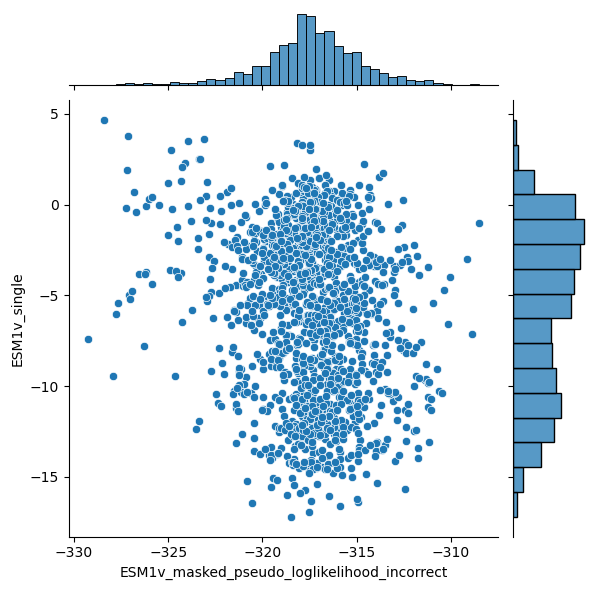

In [134]:
# Get probabilities
def incorrect_calc(sequence, log_probs):
    probs = []
    for i in range(1, len(sequence)-1):
        probs.append(log_probs[i, alphabet.get_idx(sequence[i])])
    return sum(probs)

scores_true["ESM1v_masked_pseudo_loglikelihood_incorrect"] = scores_true["mutated_sequence"].apply(lambda x: incorrect_calc(x, token_probs_masked))
sns.jointplot(data=scores_true, x="ESM1v_masked_pseudo_loglikelihood_incorrect", y=scores_true["ESM1v_single"])
spearmanr(scores_true["ESM1v_masked_pseudo_loglikelihood_incorrect"], scores_true["DMS_score"])

In [121]:
-121.25140973180532 / len(target_seq)

-1.8371425716940202

<Axes: xlabel='target_seq', ylabel='Count'>

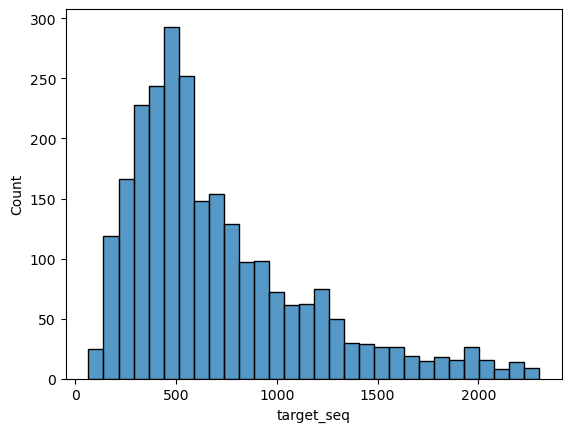

In [137]:
tmp= pd.read_csv("/Users/admin/Documents/Work/2022 Harvard/ProteinGym/reference_files/clinical_substitutions.csv")

sns.histplot(tmp["target_seq"].str.len())

In [138]:
tmp["target_seq"].str.len().max()

2302